In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [5]:
classes  = ['Cr', 'In', 'Pa', 'PS', 'RS', 'Sc']

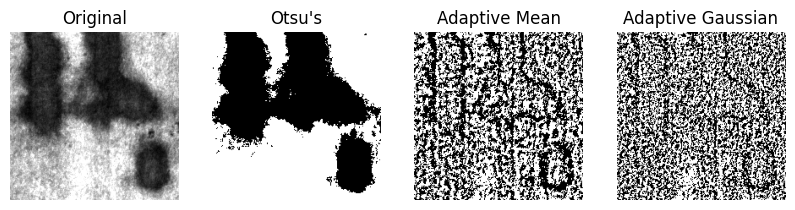

In [75]:
# otsu thresholding
# apply localthresholding called adoptice thresholding

# Load the image in grayscale
image = cv2.imread("C:\\Users\\Varshil\\STEEL SURFACE\\NEU-CLS\\Pa_108.bmp", cv2.IMREAD_GRAYSCALE)

# Otsu's Thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)

# Adaptive Mean Thresholding
adaptive_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

# Adaptive Gaussian Thresholding
adaptive_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# Display results
titles = ["Original", "Otsu's", "Adaptive Mean", "Adaptive Gaussian"]
images = [image, otsu_thresh, adaptive_mean, adaptive_gaussian]

plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()


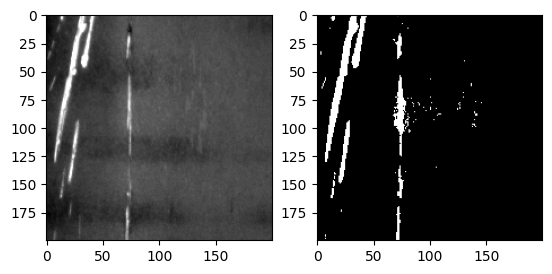

In [39]:
image = cv2.imread("C:\\Users\\Varshil\\STEEL SURFACE\\NEU-CLS\\Sc_11.bmp", cv2.IMREAD_GRAYSCALE)
im = np.where(image > np.quantile(image.flatten(),0.95), 255, 0)

plt.subplot(1, 2, 1)
plt.imshow(image, cmap = "gray")
plt.subplot(1, 2, 2)
plt.imshow(im, cmap = "gray")

### Inclusion class is giving good results in Adaptive mean method which is Local Thresholding method. 
### We will apply this to Inclusion type

### PRE PROCESSING
### ⬇️
### Histogram Equalization -> Unsharp Mask  || for -> Crazing | Pitted Surface | Rolled in Scaled 
### OTSU Thresholding || for Patches
### Global Thresholding || for Scratches
### Adaptive Mean filtering || for Inclusion
- Equalization increases contrast -> unsharp sharpens edges
- This global thresholding just takes values greater than 95% of values and makes them white and all else black
- Adaptive Mean thresholding is local thresholding which will identify local features and enhance them.


In [80]:
class pre_process:
    def __init__(self):
        self.eq_classes = [x for x in classes if x not in ["In", "Sc", "Pa"]]

    def process(self, file, i):
        gray = cv2.imread(f"C:\\Users\\Varshil\\STEEL SURFACE\\NEU-CLS\\{file}_{i}.bmp" , cv2.IMREAD_GRAYSCALE)
        
        if file in self.eq_classes:
            # 1️⃣ Histogram Equalization (for contrast enhancement)
            equalized = cv2.equalizeHist(gray)
            
            # 2️⃣ Unsharp Masking
            # args : img, kernel size, deviation in X dir, deviation in Y dir [by default same as X is taken]
            gaussian_blur = cv2.GaussianBlur(equalized, (9, 9), 10.0)
            unsharp_mask = cv2.addWeighted(equalized, 1.5, gaussian_blur, -0.5, 0)
        
            return unsharp_mask
    
        elif file == "Sc":
            thresholded = np.where(gray > np.quantile(gray.flatten(), 0.96), 255, 0)
            return thresholded

        elif file == "Pa":
            _, otsu_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
            return otsu_thresh
            
        else:
            # Adaptive Mean Thresholding
            adaptive_meaned = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
            return adaptive_meaned
            

In [4]:
#os.mkdir("Processed_Data")

### pre process and save

In [81]:
path = "Processed_Data//"
pre = pre_process()

for x in classes:
    for i in range(1, 301):
        processed_img = pre.process(x, i)
        save_path = path + f"{x}_{i}.bmp" 
        cv2.imwrite(save_path, processed_img)

### BEFORE AND AFTER

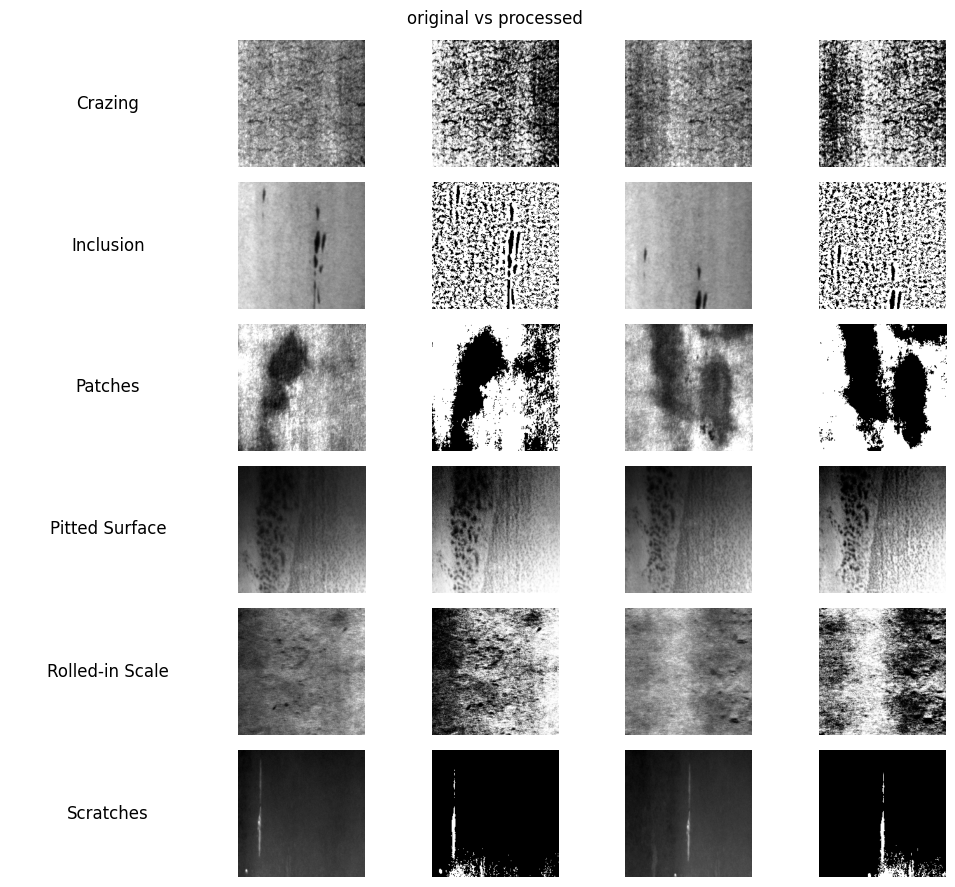

In [82]:
import matplotlib.pyplot as plt
import os

def plot_classes_grid(classes, num_images=2):
    num_classes = len(classes)
    rows = num_classes
    cols = 2 * num_images + 1  # +1 for the class label column
    class_names = ['Crazing', 'Inclusion', 'Patches', 'Pitted Surface', 'Rolled-in Scale', 'Scratches']
    
    plt.figure(figsize=(10, 1.5 * rows))

    for i, clas in enumerate(classes):
        # Plot the class label
        plt.subplot(rows, cols, i * cols + 1)
        plt.text(0.5, 0.5, class_names[i], fontsize=12, ha='center', va='center')
        plt.axis('off')

        for j in range(1, num_images + 1):  # Start from 1
            original_image_path = f"C:\\Users\\Varshil\\STEEL SURFACE\\NEU-CLS\\{clas}_{j}.bmp"
            processed_image_path = f"C:\\Users\\Varshil\\STEEL SURFACE\\Processed_Data\\{clas}_{j}.bmp"

            # Ensure subplot index stays within valid range
            subplot_index_o = i * cols + 2 + (j - 1) * 2
            subplot_index_p = subplot_index_o + 1

            if subplot_index_o > 30 or subplot_index_p > 30:
                break  # Prevent exceeding subplot limit

            # Check if original image exists
            if os.path.exists(original_image_path):
                image_o = plt.imread(original_image_path)
                plt.subplot(rows, cols, subplot_index_o)
                plt.imshow(image_o, cmap='gray')
                plt.axis('off')
            else:
                plt.subplot(rows, cols, subplot_index_o)
                plt.text(0.5, 0.5, "No Image", fontsize=8, ha='center', va='center')
                plt.axis('off')

            # Check if processed image exists
            if os.path.exists(processed_image_path):
                image_p = plt.imread(processed_image_path)
                plt.subplot(rows, cols, subplot_index_p)
                plt.imshow(image_p, cmap='gray')
                plt.axis('off')
            else:
                plt.subplot(rows, cols, subplot_index_p)
                plt.text(0.5, 0.5, "No Image", fontsize=8, ha='center', va='center')
                plt.axis('off')

    plt.suptitle("original vs processed")
    plt.tight_layout()
    plt.show()

# Example usage
plot_classes_grid(['Cr', 'In', 'Pa', 'PS', 'RS', 'Sc'])
